<a href="https://colab.research.google.com/github/rush3508/Rocketlab_Stock_Price/blob/main/LSTM_plus_Attn_Adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow -qqq
!pip install keras -qqq
!pip install yfinance -qqq


In [2]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.15.0


In [3]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960442,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
# Checking for missing values
aapl_data.isnull().sum()

# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))


In [6]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])


In [7]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Model initialization
# model = Sequential()

# # Adding the first LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Adding additional LSTM layers
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))


In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 [==============================] - 17s 135ms/step - loss: 0.0528 - val_loss: 0.0101
Epoch 2/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/100
25/25 [==============================] - 1s 26ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 6/100
25/25 [==============================] - 1s 23ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 10/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.00

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)



Epoch 1/100
25/25 [==============================] - 4s 44ms/step - loss: 0.0589 - val_loss: 0.0102
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0038
Epo

In [12]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(aapl_data) * 0.8)
train_data, test_data = aapl_data[:train_size], aapl_data[train_size:]


In [15]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)             

In [16]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 [==============================] - 8s 41ms/step - loss: 0.9421 - val_loss: 0.3742
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.5024 - val_loss: 0.4146
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.3182 - val_loss: 0.3293
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.2445 - val_loss: 0.3061
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.2258 - val_loss: 0.2804
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 0.1956 - val_loss: 0.2673
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1732 - val_loss: 0.2353
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1554 - val_loss: 0.2169
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1373 - val_loss: 0.1927
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1294 - val_loss: 0.1945

In [17]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0091 - val_loss: 0.0044
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0108 - val_loss: 0.0015
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0113 - val_loss: 0.0011
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0080 - val_loss: 0.0031
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0092 - val_loss: 0.0011
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0078 - val_loss: 7.8421e-04
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 0.0158
Epoch 9/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0114 - val_loss: 0.0011
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0073 - val_loss: 8.

In [18]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0093 - val_loss: 0.0040 - lr: 0.0010
Epoch 2/100
11/25 [============>.................] - ETA: 0s - loss: 0.0109

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 18ms/step - loss: 0.0094 - val_loss: 7.6967e-04 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0110 - val_loss: 7.3086e-04 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0106 - val_loss: 0.0018 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.0019 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0103 - val_loss: 0.0054 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0096 - val_loss: 6.0421e-04 - lr: 0.0010
Epoch 8/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0082 - val_loss: 9.6954e-04 - lr: 0.0010
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0108 - val_loss: 0.0032 - lr: 0.0010
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss

In [19]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)



6/6 [==============================] - 0s 4ms/step - loss: 0.0059
Test Loss:  0.005890408530831337


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


6/6 [==============================] - 1s 4ms/step
Mean Absolute Error:  0.07416603974141815
Root Mean Square Error:  0.07674899945218956


In [22]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

# Since we need the last 60 days to predict the next day, we reshape the data accordingly
X_latest = np.array([scaled_data[-60:].reshape(60)])

# Reshaping the data for the model (adding batch dimension)
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Making predictions for the next 4 candles
predicted_stock_price = model.predict(X_latest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 90ms/step
Predicted Stock Prices for the next 4 days:  [[202.845]]


In [23]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
Predicted Stock Prices for the next 4 days:  [202.845, 200.02847, 198.17693, 197.62335]


In [24]:
!pip install mplfinance -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


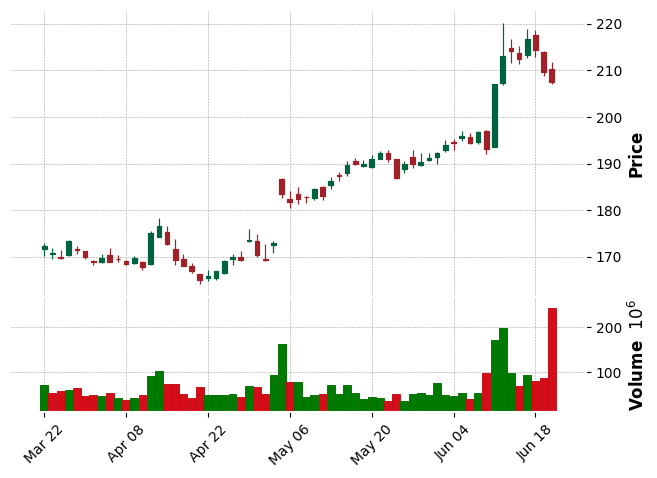

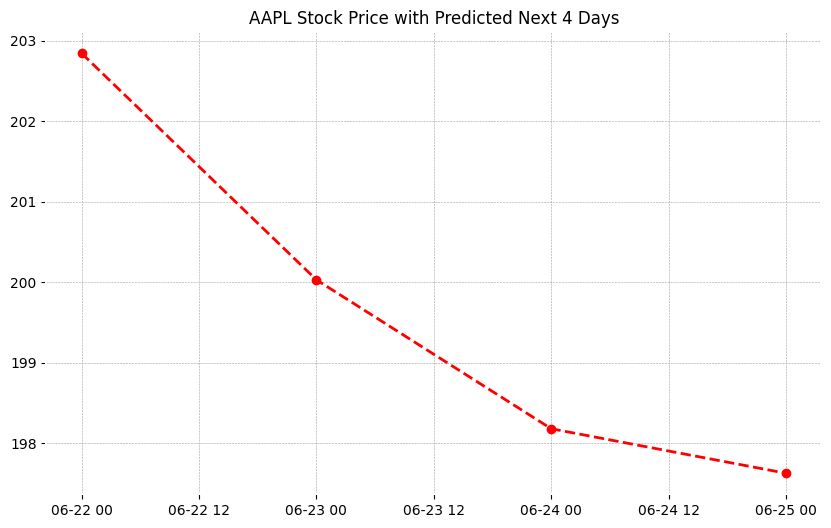

In [25]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()



[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 29ms/step


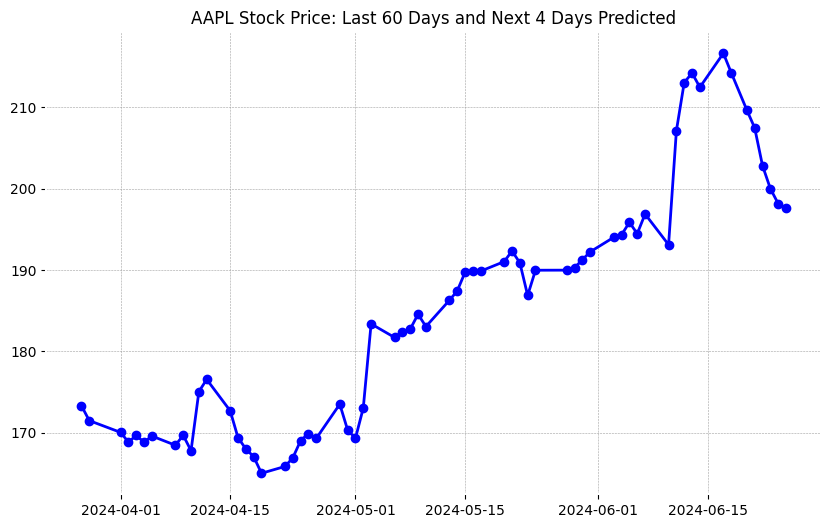

In [27]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(combined_data, linestyle='-', marker='o', color='blue')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.show()


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 19ms/step


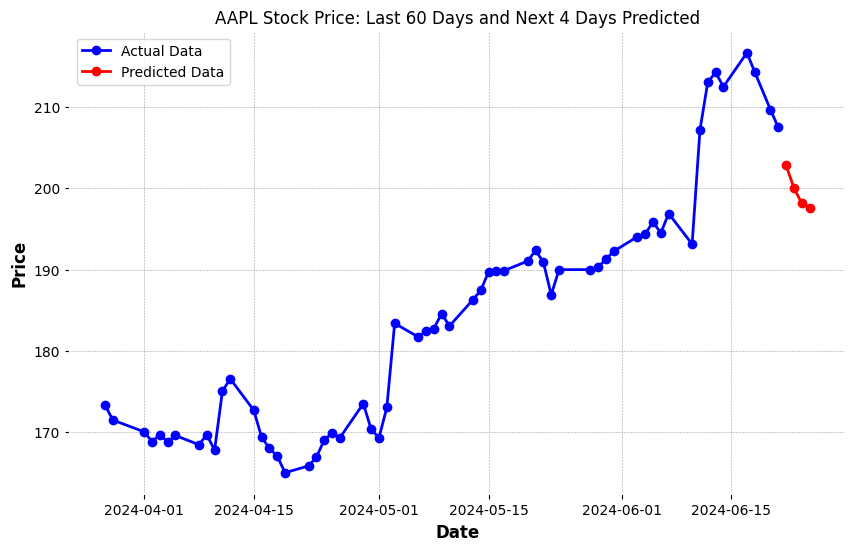

In [28]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


def predict_stock_price(input_date):
    # Check if the input date is a valid date format
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        print("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        return

    # Fetch data from yfinance
    end_date = input_date
    start_date = input_date - timedelta(days=90)  # Fetch more days to ensure we have 60 trading days
    data = yf.download('AAPL', start=start_date, end=end_date)

    if len(data) < 60:
        print("Not enough historical data to make a prediction. Try an earlier date.")
        return

    # Prepare the data
    closing_prices = data['Close'].values[-60:]  # Last 60 days
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

    # Make predictions
    predicted_prices = []
    current_batch = scaled_data.reshape(1, 60, 1)

    for i in range(4):  # Predicting 4 days
        next_prediction = model.predict(current_batch)
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    # Output the predictions
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i} prediction: {price}")

# Example use
user_input = input("Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: ")
predict_stock_price(user_input)


Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: 2024-06-23


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
Day 1 prediction: 202.84500122070312
Day 2 prediction: 200.02847290039062
Day 3 prediction: 198.1769256591797
Day 4 prediction: 197.62335205078125


In [30]:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-18-24a063037cda> in <cell line: 16>()
     14 # Transpose the DataFrame to have states as rows and their respective rates as the columns
     15 unemp_data = unemp_data.T
---> 16 unemp_data.columns = ['UnemploymentRate']
     17
     18 # Convert the UnemploymentRate column to numeric

4 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/base.py in _validate_set_axis(self, axis, new_labels)
     68
     69         elif new_len != old_len:
---> 70             raise ValueError(
     71                 f"Length mismatch: Expected axis has {old_len} elements, new "
     72                 f"values have {new_len} elements"

ValueError: Length mismatch: Expected axis has 416 elements, new values have 1 elements

SyntaxError: invalid decimal literal (<ipython-input-30-ea846a9aa4f2>, line 3)